In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dataset = pd.read_csv('./Data.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(type(y))

<class 'pandas.core.series.Series'>


## 檢查 y 中有幾種不同的標籤

In [24]:
import numpy as np

# 檢查標籤的唯一值
unique_labels = np.unique(y)
print("標籤種類數量:", len(unique_labels))
print("標籤種類:", unique_labels)

標籤種類數量: 2
標籤種類: [2 4]


In [25]:
y = y.map({2: 0, 4: 1})

unique_labels = np.unique(y)
print("標籤種類數量:", len(unique_labels))
print("標籤種類:", unique_labels)

標籤種類數量: 2
標籤種類: [0 1]


In [26]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 拆分資料

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((546, 10), (137, 10), (546,), (137,))

## Training XGBoost on the Training set

In [28]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
    # n_estimators=100,
    # learning_rate=0.1,
    # max_depth=5,
    # objective='binary:logistic'
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)


# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


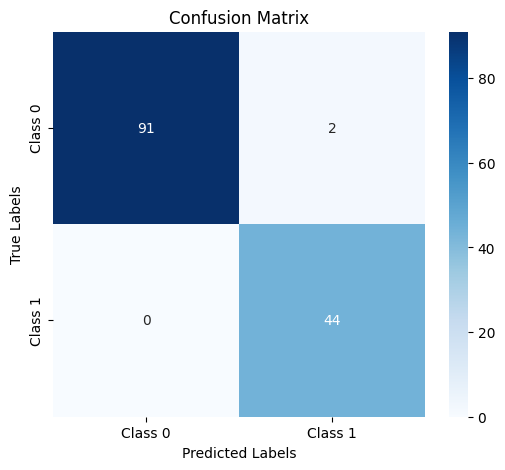

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred) # 計算混淆矩陣

# 繪製混淆矩陣的熱力圖
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Applying k-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.90 %
Standard Deviation: 1.82 %
